In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
from PIL import Image
from copy import deepcopy


# Training Models

In [2]:
import wandb

In [3]:
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: dvir-t (vision_project). Use `wandb login --relogin` to force relogin


True

## Experiment 1
### Small Model + SGD Optimizer

In [36]:
!cd yolov5 && python train.py --batch 16 --epochs 100 --data data.yaml --weights yolov5s.pt --workers 2 --name 'small_SGD'

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: dvir-t (vision_project). Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=small_SGD, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-128-gb96f35c Python-3.8.13 torch-1.12.1 CUDA:0 (Tesla M60, 8129MiB)


AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 57 weight(decay=0.0), 60 weight(decay=0.0005), 60 bias
train: Scanning /home/student/myWork/hw1/yolov5/arranged_dataset/train/labels.ca
val: Scanning /home/student/myWork/hw1/yolov5/arranged_dataset/valid/labels.cach

AutoAnchor: 5.37 anchors/target, 1.000 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to runs/train/small_SGD/labels.jpg... 
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/small_SGD
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       0/99      3.33G    0.08809     0.0426    0.05503         29        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.701      0.112     0.0345    0.00985

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      23/99      3.68G    0.02404    0.01461     0.0103         19        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.846       0.87       0.88      0.708

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      24/99      3.68G    0.02297     0.0143   0.009986         29        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.837       0.91      0.887      0.702

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      25/99      3.68G    0.02336    0.01442   0.009146         26        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.894      0.831      0.895      0.696

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      48/99      3.68G    0.01858    0.01261   0.005533         26        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.863      0.842      0.866      0.736

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      49/99      3.68G    0.01806    0.01227   0.005616         27        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.881      0.865      0.877      0.745

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      50/99      3.68G    0.01758    0.01236   0.005127         22        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.862      0.874       0.91      0.765

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      73/99      3.68G    0.01381    0.01085   0.003843         17        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263       0.88      0.859      0.911      0.804

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      74/99      3.68G    0.01333    0.01024   0.003629         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.876      0.885      0.912      0.805

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      75/99      3.68G    0.01364    0.01075   0.003562         21        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.878      0.937      0.924      0.799

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      98/99      3.68G    0.01127   0.009841   0.002398         29        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.919      0.867      0.898      0.806

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      99/99      3.68G    0.01112   0.009472   0.002582         25        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.898      0.894      0.904      0.807

100 epochs completed in 0.773 hours.
Optimizer stripped from runs/train/small_SGD/weights/last.pt, 14.4MB
Optimizer stripped from runs/train/small_SGD/weights/best.pt, 14.4MB

Validating runs/train/small_SGD/weights/best.pt...
Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
                 Class

## Experiment 2
### Small Model + AdamW Optimizer

In [2]:
!cd yolov5 && python train.py --batch 16 --epochs 100 --data data.yaml --weights yolov5s.pt --workers 2 --optimizer AdamW --name 'small_AdamW' 

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: dvir-t (vision_project). Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=AdamW, sync_bn=False, workers=2, project=runs/train, name=small_AdamW, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total

 24      [17, 20, 23]  1     35061  models.yolo.Detect                      [8, [[10, 13, 16, 30, 33, 23], [30, 61, 62, 45, 59, 119], [116, 90, 156, 198, 373, 326]], [128, 256, 512]]
Model summary: 214 layers, 7041205 parameters, 7041205 gradients, 16.0 GFLOPs

Transferred 343/349 items from yolov5s.pt
AMP: checks passed ✅
optimizer: AdamW(lr=0.01) with parameter groups 57 weight(decay=0.0), 60 weight(decay=0.0005), 60 bias
train: Scanning /home/student/myWork/hw1/yolov5/arranged_dataset/train/labels.ca
val: Scanning /home/student/myWork/hw1/yolov5/arranged_dataset/valid/labels.cach

AutoAnchor: 5.37 anchors/target, 1.000 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to runs/train/small_AdamW/labels.jpg... 
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/small_AdamW
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       0/99      3.34G    


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      22/99       3.7G    0.02625    0.01902     0.0166         23        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.836      0.669       0.78      0.545

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      23/99       3.7G    0.02547    0.01898    0.01681         19        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.608      0.834      0.815      0.573

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      24/99       3.7G    0.02562    0.01867    0.01629         29        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.694      0.715      0.767      0.492

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      47/99       3.7G    0.02094    0.01512    0.01055         23        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.907      0.849      0.901      0.701

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      48/99       3.7G    0.02046    0.01564   0.009905         26        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.891      0.808       0.88      0.673

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      49/99       3.7G    0.02061    0.01545   0.009184         27        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.872      0.846      0.897      0.693

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      72/99       3.7G    0.01658    0.01319   0.006409         13        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263       0.85      0.823      0.875      0.709

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      73/99       3.7G    0.01684    0.01329   0.006392         17        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.869       0.83      0.845      0.703

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      74/99       3.7G    0.01654    0.01279   0.006403         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.882      0.841      0.883      0.745

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      97/99       3.7G    0.01415    0.01218   0.004635         23        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.843       0.85      0.874      0.744

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      98/99       3.7G    0.01372    0.01188    0.00394         29        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.886      0.834      0.878      0.753

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      99/99       3.7G    0.01346    0.01139   0.004495         25        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.854       0.85      0.866      0.749

100 epoch

## Experiment 3
### Small Model + Adam Optimizer

In [3]:
!cd yolov5 && python train.py --batch 16 --epochs 100 --data data.yaml --weights yolov5s.pt --workers 2 --optimizer Adam --name 'small_Adam' 

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: dvir-t (vision_project). Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=Adam, sync_bn=False, workers=2, project=runs/train, name=small_Adam, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-128-g

Transferred 343/349 items from yolov5s.pt
AMP: checks passed ✅
optimizer: Adam(lr=0.01) with parameter groups 57 weight(decay=0.0), 60 weight(decay=0.0005), 60 bias
train: Scanning /home/student/myWork/hw1/yolov5/arranged_dataset/train/labels.ca
val: Scanning /home/student/myWork/hw1/yolov5/arranged_dataset/valid/labels.cach

AutoAnchor: 5.37 anchors/target, 1.000 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to runs/train/small_Adam/labels.jpg... 
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/small_Adam
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       0/99      3.34G     0.0634    0.03614    0.04374         29        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.179      0.267     0.0151    0.00288

      Epoch    GPU_mem   box_loss   obj

      47/99       3.7G    0.02445     0.0171    0.01382         23        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.563      0.834      0.795      0.591

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      48/99       3.7G    0.02358    0.01755    0.01249         26        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.808      0.764      0.837      0.636

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      49/99       3.7G    0.02462     0.0174    0.01222         27        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.801      0.842      0.881      0.628

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      50/9

      72/99       3.7G    0.01992    0.01526   0.008903         13        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.788      0.893      0.878      0.684

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      73/99       3.7G    0.02018     0.0159   0.009196         17        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.816      0.783      0.861       0.67

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      74/99       3.7G     0.0199    0.01514   0.008942         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.767      0.894      0.858      0.671

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      75/9

      97/99       3.7G    0.01575    0.01328   0.006336         23        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263       0.93      0.783       0.86      0.737

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      98/99       3.7G    0.01566     0.0132   0.004923         29        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263       0.89      0.795      0.865      0.735

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      99/99       3.7G    0.01519    0.01253   0.005857         25        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263       0.87       0.83       0.87      0.734

100 epochs completed in 0.776 hours.
Optimizer stripped from runs/train/small_Adam/weigh

## Experiment 4
### Large Model + SGD Optimizer

In [11]:
!cd yolov5 && python train.py --batch 8 --epochs 100 --data data.yaml --weights yolov5l.pt --workers 2 --name 'large_SGD'

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: dvir-t (vision_project). Use `wandb login --relogin` to force relogin
train: weights=yolov5l.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=large_SGD, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-128-gb96f35c Python-3.8.13 torch-1.12.1 CUDA:0 (Tesla M60, 8129MiB)



AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 101 weight(decay=0.0), 104 weight(decay=0.0005), 104 bias
train: Scanning /home/student/myWork/hw1/yolov5/arranged_dataset/train/labels.ca
val: Scanning /home/student/myWork/hw1/yolov5/arranged_dataset/valid/labels.cach

AutoAnchor: 5.37 anchors/target, 1.000 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to runs/train/large_SGD/labels.jpg... 
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/large_SGD
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       0/99      5.06G    0.07964    0.04516      0.054         23        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263       0.72      0.153       0.12     0.0401

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
   


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      23/99      5.41G    0.02238    0.01394   0.007514         35        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.932      0.808      0.861      0.664

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      24/99      5.41G    0.02148    0.01295   0.008228         12        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.876       0.84      0.855      0.672

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      25/99      5.41G    0.02162    0.01297   0.006638         20        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.856      0.864      0.885      0.694

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      48/99      5.41G    0.01574    0.01089   0.004928         23        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.853      0.884      0.879      0.752

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      49/99      5.41G    0.01632    0.01089   0.005044         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.903       0.85      0.872      0.759

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      50/99      5.41G    0.01552    0.01055   0.004535         19        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.893      0.854      0.897      0.773

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      73/99      5.41G    0.01223    0.00921   0.003083         27        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.927       0.86      0.879      0.798

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      74/99      5.41G    0.01187     0.0089   0.002426         22        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.928      0.867      0.892      0.804

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      75/99      5.41G    0.01152    0.00898    0.00285         19        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263       0.89      0.869      0.889      0.795

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      98/99      5.41G   0.009061    0.00791   0.002034         22        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263       0.87      0.918      0.905      0.827

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      99/99      5.41G   0.008935   0.007723   0.001907         22        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        132        263      0.863       0.89      0.904      0.818

100 epochs completed in 3.595 hours.
Optimizer stripped from runs/train/large_SGD/weights/last.pt, 92.9MB
Optimizer stripped from runs/train/large_SGD/weights/best.pt, 92.9MB

Validating runs/train/large_SGD/weights/best.pt...
Fusing layers... 
Model summary: 267 layers, 46145973 parameters, 0 gradients, 107.8 GFLOPs
                 Cla

## Experiment 5
### Small Model + Data Augmentation

In [4]:
!cd yolov5 && python train.py --batch 16 --epochs 100 --data data_augmented_with_val.yaml --weights yolov5s.pt --workers 2 --name 'small_SGD_augmented_with_val'

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: dvir-t (vision_project). Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=data_augmented_with_val.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=small_SGD_augmented_with_val, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing object

 24      [17, 20, 23]  1     35061  models.yolo.Detect                      [8, [[10, 13, 16, 30, 33, 23], [30, 61, 62, 45, 59, 119], [116, 90, 156, 198, 373, 326]], [128, 256, 512]]
Model summary: 214 layers, 7041205 parameters, 7041205 gradients, 16.0 GFLOPs

Transferred 343/349 items from yolov5s.pt
AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 57 weight(decay=0.0), 60 weight(decay=0.0005), 60 bias
train: Scanning /home/student/myWork/hw1/yolov5/augmented_dataset_with_valid/tra
train: New cache created: /home/student/myWork/hw1/yolov5/augmented_dataset_with_valid/train/labels.cache
val: Scanning /home/student/myWork/hw1/yolov5/augmented_dataset_with_valid/valid
val: New cache created: /home/student/myWork/hw1/yolov5/augmented_dataset_with_valid/valid/labels.cache

AutoAnchor: 5.35 anchors/target, 1.000 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to runs/train/small_SGD_augmented_with_val/labels.jpg... 
Image sizes 640 

      21/99      3.68G    0.01863    0.01297    0.03013         52        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        264        526      0.461      0.909      0.541      0.458

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      22/99      3.68G    0.01854    0.01275    0.03054         44        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        264        526      0.465      0.904      0.523      0.443

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      23/99      3.68G    0.01865     0.0125    0.03035         51        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        264        526      0.462      0.911      0.498      0.415

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      24/9

Bad pipe message: %s [b"\xb8uW\xea\xc7+\xe2X6\x91\\z ^*'\x156 ^\xc0\xec\xac\xd8\x8f7,", b'\xee\t\x8d\x8b\x87\xf9LjQs\xc0b-\xc2\x8a\xed\xf7\xbc\x0f\xa9\x82I\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00']
Bad pipe message: %s [b"\x7fJG\xc9%\xde\x04\xb7X\x8c\xcd\xa8F\x93\xe9\xe7%\xd2\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00

      38/99      3.68G     0.0149    0.01104    0.02928         66        640:  

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/anaconda/envs/py38_default/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/service/server_sock.py", line 100, in run
    sreq = self._sock_client.read_server_request()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
AssertionError


      38/99      3.68G    0.01507    0.01144    0.02918         74        640:  

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/anaconda/envs/py38_default/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/service/server_sock.py", line 100, in run
    sreq = self._sock_client.read_server_request()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
AssertionError


      38/99      3.68G    0.01539    0.01118    0.02889         55        640:  

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/anaconda/envs/py38_default/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/service/server_sock.py", line 100, in run
    sreq = self._sock_client.read_server_request()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
AssertionError


      38/99      3.68G    0.01534    0.01123    0.02892         50        640:  

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/anaconda/envs/py38_default/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/service/server_sock.py", line 100, in run
    sreq = self._sock_client.read_server_request()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
AssertionError


      38/99      3.68G    0.01533    0.01132    0.02903         58        640:  

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/anaconda/envs/py38_default/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/service/server_sock.py", line 100, in run
    sreq = self._sock_client.read_server_request()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
AssertionError


      38/99      3.68G    0.01528    0.01121    0.02911         76        640:  

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/anaconda/envs/py38_default/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/service/server_sock.py", line 100, in run
    sreq = self._sock_client.read_server_request()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
AssertionError


      38/99      3.68G    0.01516    0.01114    0.02911         56        640:  

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/anaconda/envs/py38_default/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/service/server_sock.py", line 100, in run
    sreq = self._sock_client.read_server_request()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
AssertionError


      38/99      3.68G    0.01503    0.01111    0.02911         46        640:  

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/anaconda/envs/py38_default/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/service/server_sock.py", line 100, in run
    sreq = self._sock_client.read_server_request()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
AssertionError


      38/99      3.68G    0.01508     0.0111    0.02917         57        640:  

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/anaconda/envs/py38_default/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/service/server_sock.py", line 100, in run
    sreq = self._sock_client.read_server_request()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
AssertionError


      38/99      3.68G    0.01505    0.01119    0.02909         54        640:  

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/anaconda/envs/py38_default/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/service/server_sock.py", line 100, in run
    sreq = self._sock_client.read_server_request()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
AssertionError


      38/99      3.68G    0.01505    0.01117    0.02905         41        640: 1
                 Class     Images  Instances          P          R      mAP50   

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/anaconda/envs/py38_default/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/service/server_sock.py", line 100, in run
    sreq = self._sock_client.read_server_request()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
AssertionError


                 Class     Images  Instances          P          R      mAP50   
                   all        264        526      0.474      0.912      0.509      0.442

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      39/99      3.68G    0.01465    0.01054    0.02812         73        640:  

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/anaconda/envs/py38_default/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/service/server_sock.py", line 100, in run
    sreq = self._sock_client.read_server_request()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
  File "/anaconda/envs/py38_default/lib/python3.8/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
AssertionError


      39/99      3.68G    0.01518    0.01121    0.02897         58        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        264        526      0.467      0.932      0.515      0.449

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      40/99      3.68G    0.01521    0.01117    0.02878         42        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        264        526      0.471      0.923      0.523      0.455

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      41/99      3.68G    0.01477    0.01101    0.02871         49        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        264        526      0.475      0.922       0.52      0.453

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      42/9

      64/99      3.68G    0.01155   0.009572    0.02779         52        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        264        526      0.467      0.921      0.504      0.444

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      65/99      3.68G    0.01141   0.009532    0.02776         51        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        264        526      0.467      0.902        0.5      0.445

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      66/99      3.68G    0.01145   0.009561    0.02788         59        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        264        526       0.47      0.927      0.512      0.454

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      67/9

      89/99      3.68G   0.009543   0.008455    0.02721         56        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        264        526      0.469      0.917      0.506      0.452

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      90/99      3.68G   0.009483   0.008202    0.02715         53        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        264        526      0.469      0.912      0.512      0.459

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      91/99      3.68G   0.009399   0.008307    0.02715         50        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        264        526      0.466      0.917      0.507      0.452

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      92/9

## Experiment 6
### Large Model + Data Augmentation

In [ ]:
!cd yolov5 && python train.py --batch 8 --epochs 100 --data data_augmented_with_val.yaml --weights yolov5l.pt --workers 2 --name 'large_SGD_augmented_with_val'

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: dvir-t (vision_project). Use `wandb login --relogin` to force relogin
train: weights=yolov5l.pt, cfg=, data=data_augmented_with_val.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=large_SGD_augmented_with_val, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use 'git pull' or 'git clone https://github.com/ultralytics/yol

Model summary: 368 layers, 46175989 parameters, 46175989 gradients, 108.3 GFLOPs

Transferred 607/613 items from yolov5l.pt
AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 101 weight(decay=0.0), 104 weight(decay=0.0005), 104 bias
train: Scanning /home/student/myWork/hw1/yolov5/augmented_dataset_with_valid/tra
val: Scanning /home/student/myWork/hw1/yolov5/augmented_dataset_with_valid/valid

AutoAnchor: 5.35 anchors/target, 1.000 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to runs/train/large_SGD_augmented_with_val/labels.jpg... 
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/large_SGD_augmented_with_val
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       0/99      5.06G    0.06932    0.04065    0.05621         13        640: 1
                 Class     Images  Instances          P          R      mAP50   
         

# Visualize Some Images

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/large_SGD/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/student/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-3-29 Python-3.8.13 torch-1.12.1 CUDA:0 (Tesla M60, 8129MiB)

Fusing layers... 
Model summary: 267 layers, 46145973 parameters, 0 gradients, 107.8 GFLOPs
Adding AutoShape... 


In [11]:
class_to_description = {0: "Right Scissors",
                        1: "Left Scissors",
                        2: "Right Needle driver",
                        3: "Left Needle driver",
                        4: "Right Forceps",
                        5: "Left Forceps",
                        6: "Right Empty",
                        7: "Left Empty"}

class_to_color = {0: (31,119,180),
                  1: (255,127,14),
                  2: (44,160,44),
                  3: (214,39,40),
                  4: (148,103,189),
                  5: (140,86,75),
                  6: (227,119,194),
                  7: (127,127,127)}

In [7]:
def visualize_image(img_name, data_type):
    img = cv2.imread(f'yolov5/arranged_dataset/{data_type}/images/{img_name}.jpg')
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    res = model(img_rgb)
    labeled_img = create_bbox(img_rgb, res.xyxy)
    return convert_cv2_to_pil(labeled_img, is_BGR=False)
    

In [15]:
def convert_cv2_to_pil(cv_image, is_BGR=True):
    if is_BGR:
        img = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
    else:
        img = cv_image
    return Image.fromarray(img)

def draw_bboxes(img, classes, bboxes):
    for cls, box in zip(classes, bboxes):
        xmin, ymin, xmax, ymax = box
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), class_to_color[cls], 2)


def draw_labels(img, classes, bboxes, confs):
    for cls, box, conf in zip(classes, bboxes, confs):
        xmin, ymin, xmax, ymax = box
        label = f"{class_to_description[cls]} {conf:.2f}"

        (w, h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 1)

        img = cv2.rectangle(img, (xmin - 1, ymin - 20), (xmin + w, ymin - 1), class_to_color[cls], -1)
        img = cv2.putText(img, label, (xmin, ymin - 5),
                          cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1)

In [9]:
def create_bbox(img, xyxy):
    if isinstance(xyxy, list):
        xyxy = xyxy[0]
    
    new_img = deepcopy(img)
    
    classes = []
    bboxes = []
    confs = []
    
    for result in xyxy:
        classes.append(int(result[-1].item()))
        confs.append(result[-2].item())
        bboxes.append([round(num) for num in result[:-2].tolist()])       
    

    draw_bboxes(new_img, classes, bboxes)
    draw_labels(new_img, classes, bboxes, confs)

    return new_img

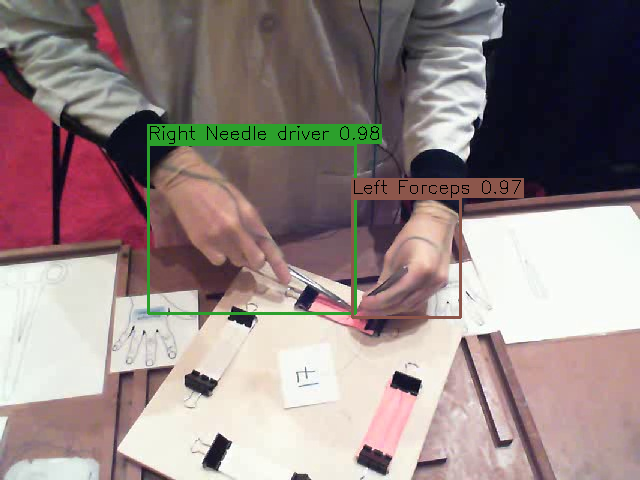

In [17]:
visualize_image('P017_balloon1_2057', 'valid')

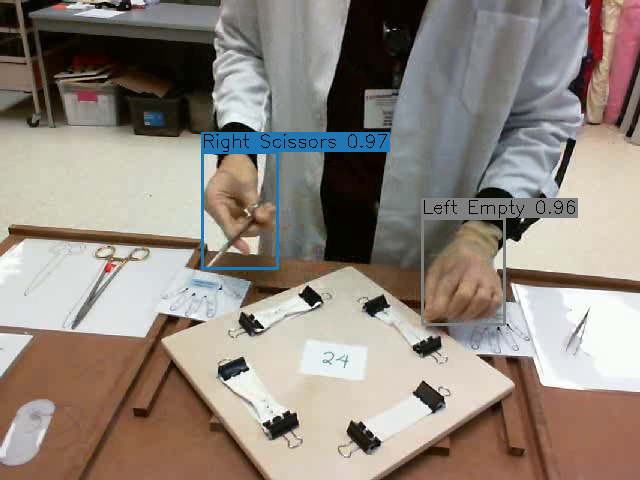

In [19]:
visualize_image('P024_tissue1_4355', 'test')